In [1]:
import os
import pandas as pd
from bbox import * 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
#for image inpainting
from skimage import data
from skimage.morphology import disk, binary_dilation
from skimage.restoration import inpaint
#convert the NO2 units to 10^15 molec/cm^2

In [2]:
##################################
# Create DataFrames
##################################

files = os.listdir('../../data/tempo_data/')
files = [file for file in files if file[:23]=='satellite_null_data_raw']

df = pd.DataFrame()
for file in files:
    temp = pd.read_csv('../../data/tempo_data/'+file)
    df = pd.concat([df, temp])
    
full_size = 240*530
df['percent_null'] =round((df['null_count']/full_size)*100, 2)    
df = df[df['percent_null']<100]
df=df.drop_duplicates()

df_nonull = df[df['null_count']==0].sample(100)
df_less1 = df[(df['null_count']!=0)&(df['percent_null']<=1)].sample(100)
df_less5 = df[(df['percent_null']>1)&(df['percent_null']<=5)].sample(100)
df_less10 = df[(df['percent_null']>5)&(df['percent_null']<=10)].sample(100)
df_less25 = df[(df['percent_null']>10)&(df['percent_null']<=25)].sample(100)
df_less50 = df[(df['percent_null']>25)&(df['percent_null']<=50)].sample(100)
df_larger50 = df[(df['percent_null']>20)].sample(100)

# Initialize an empty xarray.DataArray (replace with actual dimensions and coords)
def process_df(df):
    first_row = df.iloc[0]
    first_ds = xr.open_dataset(f'../../data/tempo_data/no2_daily_files/tempo_{first_row["date"]}.nc')
    full_ds = first_ds.sel({'time': first_row['time']})['vertical_column_troposphere']

    # Loop through remaining rows
    for i in range(1, len(df)):  # Start from the second row
        if i%10==0:
            print(i)
        row = df.iloc[i]
        date = row['date']
        time = row['time']
        ds = xr.open_dataset(f'../../data/tempo_data/no2_daily_files/tempo_{date}.nc')
        ds = ds.sel({'time': time})['vertical_column_troposphere']
        full_ds = xr.concat([full_ds, ds], dim='time')
    return full_ds

full_ds_nonull = process_df(df_nonull)
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
full_ds_nonull.to_netcdf(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc')
del full_ds_nonull

full_ds_less1 = process_df(df_less1)
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1.to_netcdf(f'../../data/tempo_data/inpaint_experiments/nulls_less1perc.nc')
del full_ds_less1

full_ds_less5 = process_df(df_less5)
unique_times, index = np.unique(full_ds_less5['time'].values, return_index=True)
full_ds_less5 = full_ds_less5.isel(time=index)
full_ds_less5.to_netcdf(f'../../data/tempo_data/inpaint_experiments/nulls_less5perc.nc')
del full_ds_less5


full_ds_less10 = process_df(df_less10)
unique_times, index = np.unique(full_ds_less10['time'].values, return_index=True)
full_ds_less10 = full_ds_less10.isel(time=index)
full_ds_less10.to_netcdf(f'../../data/tempo_data/inpaint_experiments/nulls_less10perc.nc')
del full_ds_less10


full_ds_less25 = process_df(df_less25)
unique_times, index = np.unique(full_ds_less25['time'].values, return_index=True)
full_ds_less25 = full_ds_less25.isel(time=index)
full_ds_less25.to_netcdf(f'../../data/tempo_data/inpaint_experiments/nulls_less25perc.nc')
del full_ds_less25

full_ds_less50 = process_df(df_less50)
unique_times, index = np.unique(full_ds_less50['time'].values, return_index=True)
full_ds_less50 = full_ds_less50.isel(time=index)
full_ds_less50.to_netcdf(f'../../data/tempo_data/inpaint_experiments/nulls_less50perc.nc')
del full_ds_less50

full_ds_larger50 = process_df(df_larger50)
unique_times, index = np.unique(full_ds_larger50['time'].values, return_index=True)
full_ds_larger50 = full_ds_larger50.isel(time=index)
full_ds_larger50.to_netcdf(f'../../data/tempo_data/inpaint_experiments/nulls_over50perc.nc')
del full_ds_larger50


10
20
30
40
50
60
70
80
90


In [72]:
first_ds = xr.open_dataset(f'../../data/tempo_data/no2_daily_files_old/tempo_2024-11-19.nc')

In [70]:
np.array(first_ds.isel(time=0)['vertical_column_troposphere'])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00,            nan,            nan, ...,
        1.37261368e+15, 1.23823151e+15, 0.00000000e+00],
       [0.00000000e+00,            nan,            nan, ...,
        1.48973064e+15, 1.34811680e+15, 0.00000000e+00],
       ...,
       [0.00000000e+00,            nan,            nan, ...,
        4.59157885e+15, 1.63026463e+15, 0.00000000e+00],
       [0.00000000e+00,            nan,            nan, ...,
        2.72457026e+15, 2.24586172e+15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

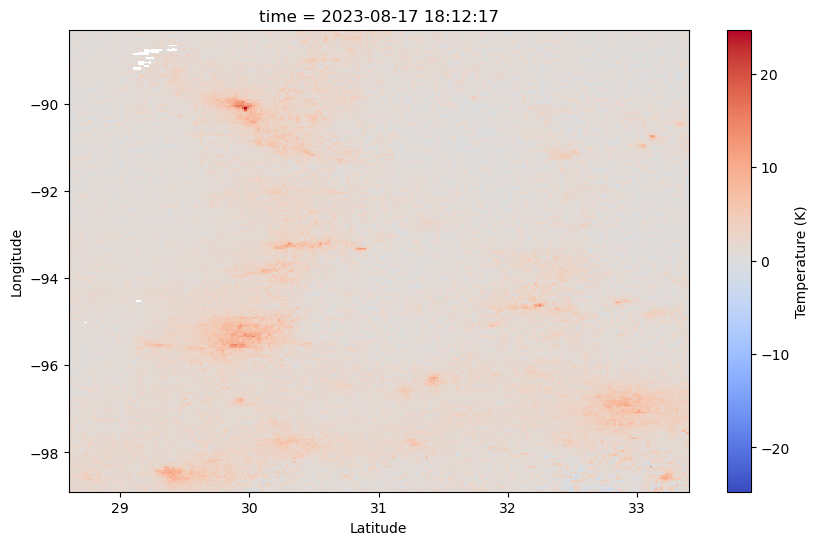

In [88]:
import matplotlib.pyplot as plt
# # Define your latitude and longitude bounds
# lat_min, lat_max = 28.6, 33.4  # Example latitude range
# lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 2  # Change this to select a different hour if desired
temperature_data = full_ds_nonull['vertical_column_troposphere_masked'].isel(time=hour_index)
# temperature_data = ds['Percent_Tree_Cover']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

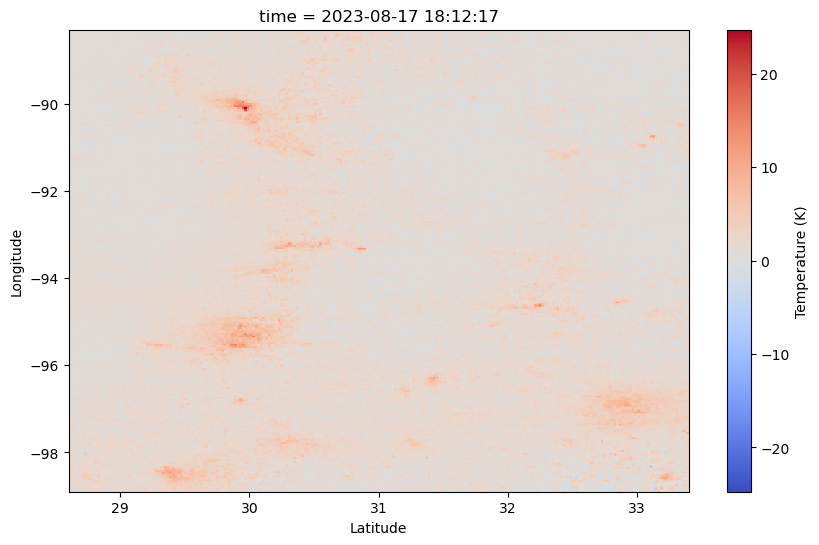

In [87]:
import matplotlib.pyplot as plt
# # Define your latitude and longitude bounds
# lat_min, lat_max = 28.6, 33.4  # Example latitude range
# lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 2  # Change this to select a different hour if desired
temperature_data = full_ds_nonull[f"{variable_name}_biharmonicinpaint"].isel(time=hour_index)
# temperature_data = ds['Percent_Tree_Cover']

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

In [81]:
import xarray as xr
import numpy as np
from skimage.restoration import inpaint
import cv2
from pykrige.ok import OrdinaryKriging
from tqdm import tqdm

# Define the variable to inpaint
variable_name = 'vertical_column_troposphere'

# Function to create nan masks (assumed already defined)
def create_nanmask(dataset, start_time, end_time):
    nan_mask = dataset[variable_name].isnull()
    nan_mask = nan_mask.assign_coords(time=full_ds_nonull['time'].isel(time=slice(start_time, end_time)))
    return nan_mask

# Load the datasets
full_ds_nonull = xr.open_dataset('../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))
full_ds_nonull[variable_name]=full_ds_nonull[variable_name]/1000000000000000

full_ds_less1 = xr.open_dataset('../../data/tempo_data/inpaint_experiments/nulls_less1perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name]=full_ds_less1[variable_name]/1000000000000000

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)

# Prepare the inpainted results arrays
shape = full_ds_nonull[f"{variable_name}_masked"].shape
inpaint_biharmonic_results = np.empty(shape, dtype=np.float32)
inpaint_cv2_results = np.empty(shape, dtype=np.float32)
inpaint_kriging_results = np.empty(shape, dtype=np.float32)

# Inpainting methods
def inpaint_biharmonic_single(time_idx, dataset, variable):
    no2 = dataset.isel(time=time_idx)[f"{variable}_masked"].values
    mask = np.isnan(no2)
    if np.all(~mask):
        return no2  # No inpainting needed
    return inpaint.inpaint_biharmonic(no2, mask)

def inpaint_cv2_single(time_idx, dataset, variable):
    no2 = dataset.isel(time=time_idx)[f"{variable}_masked"].values
    mask = np.isnan(no2).astype(np.uint8)  # OpenCV expects 8-bit single channel
    if np.all(~mask):
        return no2  # No inpainting needed
    return cv2.inpaint(no2.astype(np.float32), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

def kriging_single(time_idx, dataset, variable):
    no2 = dataset.isel(time=time_idx)[f"{variable}_masked"].values
    mask = np.isnan(no2)
    if np.all(~mask):
        return no2  # No inpainting needed

    # Extract coordinates and flatten arrays
    x, y = np.meshgrid(dataset['longitude'].values, dataset['latitude'].values)
    x_flat, y_flat, z_flat = x.flatten(), y.flatten(), no2.flatten()
    mask_flat = mask.flatten()

    # Filter valid data points
    x_valid, y_valid, z_valid = x_flat[~mask_flat], y_flat[~mask_flat], z_flat[~mask_flat]

    # Create grid for kriging
    gridx, gridy = np.meshgrid(np.unique(x), np.unique(y))

    # Perform Ordinary Kriging
    OK = OrdinaryKriging(x_valid, y_valid, z_valid, variogram_model='linear', verbose=False, enable_plotting=False)
    z_filled, _ = OK.execute('grid', gridx[0], gridy[:, 0])

    return z_filled

# Process each time step using the three methods
for i in tqdm(range(shape[0]), desc="Inpainting Time Steps"):
    # Biharmonic
    inpaint_biharmonic_results[i, :, :] = inpaint_biharmonic_single(i, full_ds_nonull, variable_name)

    # OpenCV
    inpaint_cv2_results[i, :, :] = inpaint_cv2_single(i, full_ds_nonull, variable_name)

#     # Kriging
#     inpaint_kriging_results[i, :, :] = kriging_single(i, full_ds_nonull, variable_name)

# Add results to the xarray dataset
full_ds_nonull[f"{variable_name}_biharmonicinpaint"] = (('time', 'latitude', 'longitude'), inpaint_biharmonic_results)
full_ds_nonull[f"{variable_name}_cv2inpaint"] = (('time', 'latitude', 'longitude'), inpaint_cv2_results)
# full_ds_nonull[f"{variable_name}_kriginginpaint"] = (('time', 'latitude', 'longitude'), inpaint_kriging_results)


Inpainting Time Steps: 100%|██████████| 50/50 [00:00<00:00, 149.05it/s]


In [82]:
full_ds_nonull

<xarray.Dataset> Size: 153MB
Dimensions:                                        (latitude: 240,
                                                    longitude: 530, time: 50)
Coordinates:
  * latitude                                       (latitude) float32 960B 28...
  * longitude                                      (longitude) float32 2kB -9...
  * time                                           (time) <U19 4kB '2023-08-0...
Data variables:
    vertical_column_troposphere                    (time, latitude, longitude) float64 51MB ...
    vertical_column_troposphere_masked             (time, latitude, longitude) float64 51MB ...
    vertical_column_troposphere_biharmonicinpaint  (time, latitude, longitude) float32 25MB ...
    vertical_column_troposphere_cv2inpaint         (time, latitude, longitude) float32 25MB ...

In [83]:
# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_biharmonicinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

In [85]:
# Check for NaNs in the original values
has_nans_original = np.isnan(original_flat).any()
print(f"Original values contain NaNs: {has_nans_original}")

# Check for NaNs in the inpainted (biharmonic) values
has_nans_inpainted = np.isnan(inpainted_flat).any()
print(f"Inpainted values contain NaNs: {has_nans_inpainted}")

Original values contain NaNs: False
Inpainted values contain NaNs: False


In [86]:
from sklearn.metrics import mean_absolute_error, r2_score

# Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values

# Function to compute metrics
def compute_metrics(original_values, inpainted_values, nan_mask):
    # Extract values only where nan_mask is True
    original_flat = original_values[nan_mask.values]
    inpainted_flat = inpainted_values[nan_mask.values]

    # Compute MAE and R²
    mae = mean_absolute_error(original_flat, inpainted_flat)
    r2 = r2_score(original_flat, inpainted_flat)
    return mae, r2

# Compute metrics for each method
biharmonic_values = full_ds_nonull[f"{variable_name}_biharmonicinpaint"].values
biharmonic_mae, biharmonic_r2 = compute_metrics(original_values, biharmonic_values, nan_mask)

# cv2_values = full_ds_nonull[f"{variable_name}_cv2inpaint"].values
# cv2_mae, cv2_r2 = compute_metrics(original_values, cv2_values, nan_mask)

# kriging_values = full_ds_nonull[f"{variable_name}_kriginginpaint"].values
# kriging_mae, kriging_r2 = compute_metrics(original_values, kriging_values, nan_mask)

# Print results
print("Biharmonic Inpainting:")
print(f"  MAE: {biharmonic_mae:.4f}, R²: {biharmonic_r2:.4f}")

# print("OpenCV Inpainting:")
# print(f"  MAE: {cv2_mae:.4f}, R²: {cv2_r2:.4f}")

# print("Kriging Inpainting:")
# print(f"  MAE: {kriging_mae:.4f}, R²: {kriging_r2:.4f}")

Biharmonic Inpainting:
  MAE: 0.9454, R²: 0.6670


In [ ]:
# import xarray as xr
# import numpy as np
# from skimage.restoration import inpaint
# import cv2
# from pykrige.ok import OrdinaryKriging
# from tqdm import tqdm

# # Define the variable to inpaint
# variable_name = 'vertical_column_troposphere'

# # Function to create nan masks (assumed already defined)
# def create_nanmask(dataset, start_time, end_time):
#     nan_mask = dataset[variable_name].isnull()
#     nan_mask = nan_mask.assign_coords(time=full_ds_nonull['time'].isel(time=slice(start_time, end_time)))
#     return nan_mask

# # Load the datasets
# full_ds_nonull = xr.open_dataset('../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
# unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
# full_ds_nonull = full_ds_nonull.isel(time=index)
# full_ds_nonull = full_ds_nonull.isel(time=slice(0, 50))

# full_ds_less1 = xr.open_dataset('../../data/tempo_data/inpaint_experiments/nulls_less1perc.nc', engine='netcdf4')
# unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
# full_ds_less1 = full_ds_less1.isel(time=index)
# nan_mask = create_nanmask(full_ds_less1, 0, 50)

# # full_ds_less5 = xr.open_dataset('../../data/tempo_data/inpaint_experiments/nulls_less5perc.nc', engine='netcdf4')
# # unique_times, index = np.unique(full_ds_less5['time'].values, return_index=True)
# # full_ds_less5 = full_ds_less5.isel(time=index)
# # nan_mask2 = create_nanmask(full_ds_less5, 50, 100)

# # full_ds_less25 = xr.open_dataset('../../data/tempo_data/inpaint_experiments/nulls_less25perc.nc', engine='netcdf4')
# # unique_times, index = np.unique(full_ds_less25['time'].values, return_index=True)
# # full_ds_less25 = full_ds_less25.isel(time=index)
# # nan_mask3 = create_nanmask(full_ds_less25, 100, 150)

# # full_ds_less50 = xr.open_dataset('../../data/tempo_data/inpaint_experiments/nulls_less50perc.nc', engine='netcdf4')
# # unique_times, index = np.unique(full_ds_less50['time'].values, return_index=True)
# # full_ds_less50 = full_ds_less50.isel(time=index)
# # nan_mask4 = create_nanmask(full_ds_less50, 150, 200)

# # full_ds_larger50 = xr.open_dataset('../../data/tempo_data/inpaint_experiments/nulls_over50perc.nc', engine='netcdf4')
# # unique_times, index = np.unique(full_ds_larger50['time'].values, return_index=True)
# # full_ds_larger50 = full_ds_larger50.isel(time=index)
# # nan_mask5 = create_nanmask(full_ds_larger50, 200, 250)

# # # Concatenate all nan masks along the time dimension
# # nan_mask = xr.concat([nan_mask1, nan_mask2, nan_mask3, nan_mask4, nan_mask5], dim="time")
# # del nan_mask1, nan_mask2, nan_mask3, nan_mask4, nan_mask5
# # del full_ds_less1, full_ds_less5, full_ds_less25, full_ds_less50, full_ds_larger50

# time_dimension_nonulls = full_ds_nonull['time']
# nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
# full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)

# inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

# for i in range(0,250):
#     try:
#         no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
#         no2_array = np.array(no2)
#         mask = np.isnan(no2_array)
#         image_result = inpaint.inpaint_biharmonic(no2_array, mask)

#         # Assign the inpainted result to the new variable for each time step
#         inpainted_results[i, :, :] = image_result
#     except:
#         pass
    
# full_ds_nonull[f"{variable_name}_bh_inpaint"] = (('time', 'lat', 'lon'), inpainted_results)
# del inpainted_results
# del image_result
# del mask
# del no2_array
# del no2

# df = full_ds_nonull.to_dataframe()

In [ ]:
df.head()

In [ ]:
# # Prepare the inpainted results arrays
# shape = full_ds_nonull[f"{variable_name}_masked"].shape
# inpaint_biharmonic_results = np.empty(shape, dtype=np.float32)
# inpaint_cv2_results = np.empty(shape, dtype=np.float32)
# inpaint_kriging_results = np.empty(shape, dtype=np.float32)

# # Inpainting methods
# def inpaint_biharmonic_single(time_idx, dataset, variable):
#     no2 = dataset.isel(time=time_idx)[f"{variable}_masked"].values
#     mask = np.isnan(no2)
#     if np.all(~mask):
#         return no2  # No inpainting needed
#     return inpaint.inpaint_biharmonic(no2, mask)

# def inpaint_cv2_single(time_idx, dataset, variable):
#     no2 = dataset.isel(time=time_idx)[f"{variable}_masked"].values
#     mask = np.isnan(no2).astype(np.uint8)  # OpenCV expects 8-bit single channel
#     if np.all(~mask):
#         return no2  # No inpainting needed
#     return cv2.inpaint(no2.astype(np.float32), mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# def kriging_single(time_idx, dataset, variable):
#     no2 = dataset.isel(time=time_idx)[f"{variable}_masked"].values
#     mask = np.isnan(no2)
#     if np.all(~mask):
#         return no2  # No inpainting needed

#     # Extract coordinates and flatten arrays
#     x, y = np.meshgrid(dataset['longitude'].values, dataset['latitude'].values)
#     x_flat, y_flat, z_flat = x.flatten(), y.flatten(), no2.flatten()
#     mask_flat = mask.flatten()

#     # Filter valid data points
#     x_valid, y_valid, z_valid = x_flat[~mask_flat], y_flat[~mask_flat], z_flat[~mask_flat]

#     # Create grid for kriging
#     gridx, gridy = np.meshgrid(np.unique(x), np.unique(y))

#     # Perform Ordinary Kriging
#     OK = OrdinaryKriging(x_valid, y_valid, z_valid, variogram_model='linear', verbose=False, enable_plotting=False)
#     z_filled, _ = OK.execute('grid', gridx[0], gridy[:, 0])

#     return z_filled

# # Process each time step using the three methods
# for i in tqdm(range(shape[0]), desc="Inpainting Time Steps"):
#     # Biharmonic
#     inpaint_biharmonic_results[i, :, :] = inpaint_biharmonic_single(i, full_ds_nonull, variable_name)

#     # OpenCV
#     inpaint_cv2_results[i, :, :] = inpaint_cv2_single(i, full_ds_nonull, variable_name)

#     # Kriging
#     inpaint_kriging_results[i, :, :] = kriging_single(i, full_ds_nonull, variable_name)

# # Add results to the xarray dataset
# full_ds_nonull[f"{variable_name}_biharmonicinpaint"] = (('time', 'latitude', 'longitude'), inpaint_biharmonic_results)
# full_ds_nonull[f"{variable_name}_cv2inpaint"] = (('time', 'latitude', 'longitude'), inpaint_cv2_results)
# full_ds_nonull[f"{variable_name}_kriginginpaint"] = (('time', 'latitude', 'longitude'), inpaint_kriging_results)

# # Save the updated dataset
# full_ds_nonull.to_netcdf('../../data/tempo_data/inpaint_experiments/inpainted_results_.nc')

# print("Inpainting completed and results saved.")

In [93]:
full_ds_nonull = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/no_nulls.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_nonull['time'].values, return_index=True)
full_ds_nonull = full_ds_nonull.isel(time=index)
full_ds_nonull= full_ds_nonull.isel(time=slice(0, 50))
full_ds_nonull[variable_name]=full_ds_nonull[variable_name]/1000000000000000


full_ds_less1 = xr.open_dataset(f'../../data/tempo_data/inpaint_experiments/nulls_less1perc.nc', engine='netcdf4')
unique_times, index = np.unique(full_ds_less1['time'].values, return_index=True)
full_ds_less1 = full_ds_less1.isel(time=index)
full_ds_less1[variable_name]=full_ds_less1[variable_name]/1000000000000000

variable_name = 'vertical_column_troposphere'  # Replace with the actual variable name
nan_mask = full_ds_less1[variable_name].isnull()
time_dimension_nonulls = full_ds_nonull['time']
nan_mask = nan_mask.assign_coords(time=time_dimension_nonulls)
full_ds_nonull[f"{variable_name}_masked"] = full_ds_nonull[variable_name].where(~nan_mask)
del full_ds_less1
del unique_times
del index

inpainted_results = np.empty_like(full_ds_nonull[f"{variable_name}_masked"])

for i in range(50):
    no2 = full_ds_nonull.isel(time=i)[f"{variable_name}_masked"]
    no2_array = np.array(no2)
    mask = np.isnan(no2_array)
    image_result = inpaint.inpaint_biharmonic(no2_array, mask)
    
    # Assign the inpainted result to the new variable for each time step
    inpainted_results[i, :, :] = image_result
    
full_ds_nonull[f"{variable_name}_withinpaint"] = (('time', 'latitude', 'longitude'), inpainted_results)
del inpainted_results
del image_result
del mask
del no2_array
del no2

# df = full_ds_nonull.to_dataframe()

In [96]:
# # Extract original values (masked by nan_mask)
original_values = full_ds_nonull.where(nan_mask)[variable_name].values
original_flat = original_values[nan_mask.values]

biharmonic_values = full_ds_nonull[f"{variable_name}_withinpaint"].values
inpainted_flat = biharmonic_values[nan_mask.values]

mae = mean_absolute_error(original_flat, inpainted_flat)
r2 = r2_score(original_flat, inpainted_flat)

In [98]:
mae

0.9454441276504665

In [97]:
r2

0.6670403692163034